In [208]:
import pandas as pd
import pandas as pd
from tqdm import tqdm_notebook as tqdm

#Scikit-learn


#NLTK
import nltk
from nltk.corpus import stopwords

import plotly.express as px

nltk.download("stopwords")
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

from nltk.stem.snowball import SnowballStemmer 
import string
import re
from nltk.stem import *
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation


from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, ADASYN


from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression

from catboost import CatBoostRegressor

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv('./df_sep_label_.csv')

In [3]:
data.head(5)

,sentiment,Классификация по ОКПД2_x,Наименование закупки_x,Реестровый номер закупки,Закупки по,Дата размещения
0,Не подходит,62.01.29.000: Оригиналы программного обеспечен...,Предоставление неисключительного права испол...,№0169300040423000063,44-ФЗ,04.09.2023
1,Подходит,62.09.20.190: Услуги по технической поддержке ...,оказание услуг по обслуживанию и сопровождени...,№0304300010623000024,44-ФЗ,21.09.2023
2,Не подходит,62.02.20.190: Услуги консультативные в области...,Предоставление услуг по сопровождению програм...,№0162300011123000065,44-ФЗ,07.09.2023
3,Не подходит,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0122100010223000021,44-ФЗ,18.09.2023
4,Не подходит,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0302300050523000034,44-ФЗ,21.08.2023


In [4]:
data.shape

(3204, 6)

In [5]:
data.rename(columns={'Классификация по ОКПД2_x':'okpd_2'},inplace=True)
data.rename(columns={'Наименование закупки_x':'name'},inplace=True)
data.rename(columns={'Реестровый номер закупки':'number'},inplace=True)
data.rename(columns={'Закупки по':'fz'},inplace=True)
data.rename(columns={'Дата размещения':'date'},inplace=True)


In [6]:
data

,sentiment,okpd_2,name,number,fz,date
0,Не подходит,62.01.29.000: Оригиналы программного обеспечен...,Предоставление неисключительного права испол...,№0169300040423000063,44-ФЗ,04.09.2023
1,Подходит,62.09.20.190: Услуги по технической поддержке ...,оказание услуг по обслуживанию и сопровождени...,№0304300010623000024,44-ФЗ,21.09.2023
2,Не подходит,62.02.20.190: Услуги консультативные в области...,Предоставление услуг по сопровождению програм...,№0162300011123000065,44-ФЗ,07.09.2023
3,Не подходит,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0122100010223000021,44-ФЗ,18.09.2023
4,Не подходит,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0302300050523000034,44-ФЗ,21.08.2023
...,...,...,...,...,...,...
3199,Не подходит,62.02.30.000: Услуги по технической поддержке ...,"Оказание услуг по восстановлению, обновлению п...",№32312635470,223-ФЗ,01.08.2023
3200,Не подходит,62.02.30.000: Услуги по технической поддержке ...,Оказание услуг по обслуживанию программы 1С:Бу...,№32312635242,223-ФЗ,01.08.2023
3201,Не подходит,62.03.12.130: Услуги по сопровождению компьюте...,Услуги по адаптации и сопровождению экземпляро...,№32312634646,223-ФЗ,01.08.2023
3202,Не подходит,62.09.2: Услуги в области информационных техно...,Предоставление права использования программы д...,№32312634315,223-ФЗ,01.08.2023


In [7]:
data.isnull().sum()

sentiment    18
okpd_2        2
name          0
number        0
fz            0
date          0
dtype: int64

Мы видим присутствие пропущенных значений, необходимо их удалить.

In [8]:
data.dropna(subset=['sentiment'], inplace=True)
data.dropna(subset=['okpd_2'], inplace=True)

In [9]:
data.isnull().sum()

sentiment    0
okpd_2       0
name         0
number       0
fz           0
date         0
dtype: int64

In [154]:
#Дополнение списка стоп-слов
# Дополнить список

stop_words = stopwords.words('russian')
stop_words.append('енпф')
stop_words.append('«')
stop_words.append('»')

Функция предобработки данных.

In [153]:
def preprocessing(texts):
    new_text = []
    for i in tqdm(range(len(texts))):  # Итерируемся по индексам текстов в списке texts
        text = texts[i]  # Получаем текущий текст по индексу i
        stop_free = " ".join([i for i in text.lower().split() if i not in stop_words]) 
        # Преобразуем текст в нижний регистр, разделяем на слова и удаляем стоп-слова (слова, которые не несут смысловой нагрузки)
        punc_free = ''.join(ch for ch in stop_free if ch not in spec_chars) 
        # Удаляем пунктуацию (символы, не относящиеся к словам)
        lem_text = " ".join([lemma.parse(word)[0].normal_form for word in punc_free.split(' ')]) 
        # Применяем лемматизацию к каждому слову и объединяем обработанные слова обратно в текст
        new_text.append(lem_text) 
        # Добавляем обработанный текст в список new_text
    return new_text  # Возвращаем список new_text, содержащий все обработанные тексты

In [12]:
print(data['sentiment'].unique(), len(data['sentiment'].unique()))

['Не подходит' 'Подходит' 'Скорее нет' 'Скорее да' 'Затрудняюсь'] 5


## Выборка данных

In [13]:
topics = ['Не подходит', 'Подходит', 'Скорее нет', 'Скорее да', 'Затрудняюсь']

In [14]:
df_res = pd.DataFrame()
in_cat_count = data.shape[0]

for topic in tqdm(topics):
    df_topic = data[data['sentiment'] == topic][:in_cat_count]
    df_res = df_res.append(df_topic, ignore_index=True)

C:\Users\Mi\AppData\Local\Temp\ipykernel_14208\1222733655.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for topic in tqdm(topics):


  0%|          | 0/5 [00:00<?, ?it/s]

In [15]:
df_res.shape

(3184, 6)

## Предобработка

In [128]:
def remove_punctuation(text):
    text = text.replace('«', '').replace('»', '') # добавил обработку ковычек
    text = text.replace('№', '')  # добавил обработку символа "№"
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text):
    return ''.join([i if not i.isdigit() else ' ' for i in text])


def remove_multiple_spaces(text):
	return re.sub(r'\s+', ' ', text, flags=re.I)

mystem = Mystem() 

russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['…', '«', '»', '...'])

def lemmatize_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords and token != " "]
    text = " ".join(tokens)
    return text

In [17]:
df_res['fz'] = df_res['fz'].replace('44-ФЗ', 44)
df_res['fz'] = df_res['fz'].replace('223-ФЗ', 223)

In [18]:
preproccessing = lambda text: (remove_multiple_spaces(remove_numbers(remove_punctuation(text))))
df_res['preproccessed_name'] = list(map(preproccessing, df_res['name']))
df_res['preproccessed_okpd_2'] = list(map(preproccessing, df_res['okpd_2']))

In [19]:
prep_preproccessed_name = [remove_multiple_spaces(remove_numbers(remove_punctuation(text.lower()))) for text in tqdm(df_res['preproccessed_name'])]
prep_preproccessed_okpd_2 = [remove_multiple_spaces(remove_numbers(remove_punctuation(text.lower()))) for text in tqdm(df_res['preproccessed_okpd_2'])]

C:\Users\Mi\AppData\Local\Temp\ipykernel_14208\2915617272.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prep_preproccessed_name = [remove_multiple_spaces(remove_numbers(remove_punctuation(text.lower()))) for text in tqdm(df_res['preproccessed_name'])]


  0%|          | 0/3184 [00:00<?, ?it/s]

C:\Users\Mi\AppData\Local\Temp\ipykernel_14208\2915617272.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prep_preproccessed_okpd_2 = [remove_multiple_spaces(remove_numbers(remove_punctuation(text.lower()))) for text in tqdm(df_res['preproccessed_okpd_2'])]


  0%|          | 0/3184 [00:00<?, ?it/s]

In [20]:
len(prep_preproccessed_name)
prep_preproccessed_name[3180]

'оказание услуг по внедрению мобильного приложения для управления личным кабинетом абонента'

In [21]:
len(prep_preproccessed_okpd_2)
prep_preproccessed_okpd_2[3180]

' услуги по установке программного обеспечения'

In [22]:
df_res['preproccessed_name'] = prep_preproccessed_name
df_res['preproccessed_okpd_2'] = prep_preproccessed_okpd_2

In [23]:
fig = px.histogram(df_res, x='sentiment')
fig.show()

In [24]:
df_res.loc[df_res['sentiment'].isin(['Не подходит', 'Скорее нет', 'Затрудняюсь']), 'sentiment'] = 0
df_res.loc[df_res['sentiment'].isin(['Подходит', 'Скорее да']), 'sentiment'] = 1

In [25]:
fig = px.histogram(df_res, x='sentiment')
fig.show()

In [26]:
df_res.head(3)

,sentiment,okpd_2,name,number,fz,date,preproccessed_name,preproccessed_okpd_2
0,0,62.01.29.000: Оригиналы программного обеспечен...,Предоставление неисключительного права испол...,№0169300040423000063,44,04.09.2023,предоставление неисключительного права исполь...,оригиналы программного обеспечения прочие
1,0,62.02.20.190: Услуги консультативные в области...,Предоставление услуг по сопровождению програм...,№0162300011123000065,44,07.09.2023,предоставление услуг по сопровождению програм...,услуги консультативные в области компьютерных...
2,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0122100010223000021,44,18.09.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие


### Стемминг

Стемминг — это процесс обработки текста, направленный на нахождение основы слова (стема) путем удаления аффиксов (окончаний) и суффиксов. Цель стемминга состоит в том, чтобы привести различные формы одного слова к единой основе. Например, слова "бегу", "бежим", "бежал" будут приведены к общей основе "беж".

Стемминг позволяет уменьшить размер словаря, улучшить процесс поиска и анализа текста, а также улучшить качество моделей обработки естественного языка. Однако стемминг не всегда точен, так как он может привести к потере части информации и к неоднозначности в некоторых случаях.

In [151]:
stemmer = SnowballStemmer("russian") 

In [152]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['…', '«', '»', '...', 'т.д.', 'т', 'д'])

данный код разбивает текст из столбца 'preproccessed_name' первой строки DataFrame на отдельные слова (токены) с помощью токенизации слов.

In [116]:
text = df_res['preproccessed_name'][0]
word_tokenize(text) 

['предоставление',
 'неисключительного',
 'права',
 'использования',
 'антивирусного',
 'программного',
 'обеспечения',
 'kaspersky',
 'endpoint',
 'security',
 'для',
 'бизнеса',
 'стандартный',
 'russian',
 'edition']

In [113]:
stemmed_preproccessed_name = []
for text in tqdm(df_res['preproccessed_name']):
    tokens = word_tokenize(text)    
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in russian_stopwords]
    text = " ".join(stemmed_tokens)
    stemmed_preproccessed_name.append(text)

df_res['preproccessed_name_stem'] = stemmed_preproccessed_name


stemmed_preproccessed_okpd_2 = []
for text in tqdm(df_res['preproccessed_okpd_2']):
    tokens = word_tokenize(text)    
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in russian_stopwords]
    text = " ".join(stemmed_tokens)
    stemmed_preproccessed_okpd_2.append(text)

df_res['preproccessed_okpd_2_stem'] = stemmed_preproccessed_okpd_2

C:\Users\Mi\AppData\Local\Temp\ipykernel_25500\3732494110.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for text in tqdm(df_res['preproccessed_name']):


  0%|          | 0/3184 [00:00<?, ?it/s]

NameError: name 'stemmer' is not defined

In [31]:
df_res.sample(3)

,sentiment,okpd_2,name,number,fz,date,preproccessed_name,preproccessed_okpd_2,preproccessed_name_stem,preproccessed_okpd_2_stem
148,0,62.02.20.190: Услуги консультативные в области...,Выполнение работ по разработке комплекта докум...,№0156200009923000878,44,15.08.2023,выполнение работ по разработке комплекта докум...,услуги консультативные в области компьютерных...,выполнен работ разработк комплект документ рег...,услуг консультативн област компьютерн технолог...
1455,0,62.02.30.000: Услуги по технической поддержке ...,Оказание услуг по передаче сертификата активац...,№0352300028923000112,44,21.09.2023,оказание услуг по передаче сертификата активац...,услуги по технической поддержке информационны...,оказан услуг передач сертификат активац сервис...,услуг техническ поддержк информацион технолог
832,0,62.01.29.000: Оригиналы программного обеспечен...,Оказание услуг по предоставлению программного ...,№0142200001323021074,44,29.09.2023,оказание услуг по предоставлению программного ...,оригиналы программного обеспечения прочие при...,оказан услуг предоставлен программн обеспечен ...,оригинал программн обеспечен проч приложен общ...


In [108]:
def remove_stop_words(text):
    tokens = word_tokenize(text) 
    tokens = [token for token in tokens if token not in russian_stopwords and token != ' ']
    return " ".join(tokens)

In [33]:
# sw_texts_list = []
# for text in tqdm(df_res['text_prep']):
#     tokens = word_tokenize(text)    
#     tokens = [token for token in tokens if token not in russian_stopwords and token != ' ']
#     text = " ".join(tokens)
#     sw_texts_list.append(text)

# df_res['text_sw'] = sw_texts_list

In [34]:
df_res['preproccessed_name_stem'][355]

'оказан год услуг адаптац сопровожден экземпляр справочн правов сист консультант плюс'

In [35]:
df_res.to_csv('df_1t_stemmed.csv')

## Лемматизация

Лемматизация - это процесс приведения слова к его нормальной форме, так называемой лемме. Лемма - это базовая форма слова, которая является словарной формой этого слова. Например, леммой для слова "бежал", "бежит", "бежим" будет слово "бежать".

Лемматизация применяется для стандартизации текста и уменьшения размера словаря, что улучшает качество анализа текста и обработки естественного языка. Это помогает избежать проблем с различными формами слова и повысить точность анализа.

Недостатки лемматизации включают в себя:
1. Высокую вычислительную сложность: лемматизация может потребовать больше времени и ресурсов для обработки текста по сравнению со стеммингом.
2. Возможные потери информации: в некоторых случаях лемматизация может привести к потере некоторых деталей или нюансов, так как слова могут быть приведены к общей форме.
3. Неоднозначность: некоторые слова могут иметь несколько лемм, что может вызвать неоднозначность в некоторых случаях.

Несмотря на недостатки, лемматизация обычно предпочтительнее стемминга в задачах обработки естественного языка, так как она обеспечивает более точное приведение слов к их базовым формам.

In [36]:
# 40 минут выполения, далее сохраним датасет с лемматизацией

lemm_texts_list = []
for text in tqdm(df_res['preproccessed_name']):
    
    try:
        text_lem = mystem.lemmatize(text)
        tokens = [token for token in text_lem if token != ' ' and token not in russian_stopwords]
        text = " ".join(tokens)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df_res['preproccessed_name_lemm'] = lemm_texts_list

C:\Users\Mi\AppData\Local\Temp\ipykernel_14208\932139226.py:4: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3184 [00:00<?, ?it/s]

In [37]:
lemm_texts_list = []
for text in tqdm(df_res['preproccessed_okpd_2']):
    
    try:
        text_lem = mystem.lemmatize(text)
        tokens = [token for token in text_lem if token != ' ' and token not in russian_stopwords]
        text = " ".join(tokens)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df_res['preproccessed_okpd_2_lemm'] = lemm_texts_list

C:\Users\Mi\AppData\Local\Temp\ipykernel_14208\1452289500.py:2: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3184 [00:00<?, ?it/s]

Для ускорения выполнения кода с помощью функции  `lru_cache`  из библиотеки  `functools` , вам нужно создать декоратор и применить его к функции  `mystem.lemmatize()` . 





df_res['text_lemm'] = lemm_texts_list
В этом примере мы создаем декоратор  `lemmatize_text()` , который применяется к функции  `mystem.lemmatize()` . Декоратор  `lru_cache`  кэширует результаты вызовов функции, что позволяет избежать повторных вычислений для одних и тех же входных данных.

Обратите внимание, что декоратор  `lru_cache`  имеет аргумент  `maxsize` , который определяет максимальный размер кэша. Установка  `maxsize=None`  означает, что кэш будет неограниченного размера. Вы можете установить конкретное значение  `maxsize` , чтобы ограничить использование памяти кэша.

Применение декоратора  `lru_cache`  к функции  `mystem.lemmatize()`  позволит кэшировать результаты и избежать повторных вызовов для одних и тех же текстовых данных, что должно ускорить выполнение кода.

In [38]:
# После выполнения этого кода одни NaN !!!!!!

# from functools import lru_cache

# @lru_cache(maxsize=None)
# def lemmatize_text(text):
#     return mystem.lemmatize(text)

# lemm_texts_list = []
# for text in tqdm(df_res['text_sw']):
#     try:
#         text_lem = lemmatize_text(text)
#         tokens = [token for token in text_lem if token != ' ' and token not in russian_stopwords]
#         text = " ".join(tokens)
#         lemm_texts_list.append(text)
#     except Exception as e:
#         print(e)
        
# # df_res['text_lemm'] = lemm_texts_list     # выдал ошибку ValueError: Length of values (0) does not match length of index (3184)

# # Этот код добавит пустые значения ( `None` ) в конец списка  `lemm_texts_list`  
# # до тех пор, пока его длина не будет соответствовать длине индекса DataFrame  `df_res` .
# df_res['text_lemm'] = lemm_texts_list + [None] * (len(df_res) - len(lemm_texts_list))

In [39]:
def lemmatize_text(text):
    text_lem = mystem.lemmatize(text)
    tokens = [token for token in text_lem if token != ' ']
    return " ".join(tokens)

In [40]:
df_res.to_csv('lemm_df_1t.csv')

----------------------

----------------------------

In [2]:
df_res = pd.read_csv('lemm_df_1t.csv', encoding = 'utf-8')

In [5]:
df_res = df_res.drop(['Unnamed: 0'], axis=1)

In [6]:
df_res.head(2)

,sentiment,okpd_2,name,number,fz,date,preproccessed_name,preproccessed_okpd_2,preproccessed_name_stem,preproccessed_okpd_2_stem,preproccessed_name_lemm,preproccessed_okpd_2_lemm
0,0,62.01.29.000: Оригиналы программного обеспечен...,Предоставление неисключительного права испол...,№0169300040423000063,44,04.09.2023,предоставление неисключительного права исполь...,оригиналы программного обеспечения прочие,предоставлен неисключительн прав использован а...,оригинал программн обеспечен проч,предоставление неисключительный право использо...,оригинал программный обеспечение прочий \n
1,0,62.02.20.190: Услуги консультативные в области...,Предоставление услуг по сопровождению програм...,№0162300011123000065,44,07.09.2023,предоставление услуг по сопровождению програм...,услуги консультативные в области компьютерных...,предоставлен услуг сопровожден программн компл...,услуг консультативн област компьютерн технолог...,предоставление услуга сопровождение программны...,услуга консультативный область компьютерный те...


In [192]:
fig = px.histogram(df_res, x='sentiment')
fig.show()

Борьба с дисбалансом классов

In [7]:
df_res['sentiment'] = df_res['sentiment'].astype('int')

In [8]:
X = df_res[['name']]
X_prep = df_res[['preproccessed_name']]
X_prep_stem = df_res[['preproccessed_name_stem']]
X_prep_lemm = df_res[['preproccessed_name_lemm']]

y = df_res['sentiment']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 42, stratify=y)

X_train_prep, X_test_prep, y_train_prep, y_test_prep = train_test_split(X_prep, y, test_size=0.15, random_state = 42, stratify=y)

X_train_prep_stem, X_test_prep_stem, y_train_prep_stem, y_test_prep_stem = train_test_split(X_prep_stem, y, test_size=0.15, random_state = 42, stratify=y)

X_train_prep_lemm, X_test_prep_lemm, y_train_prep_lemm, y_test_prep_lemm = train_test_split(X_prep_lemm, y, test_size=0.15, random_state = 42, stratify=y)

## TfidfVectorizer

In [197]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer_prep = TfidfVectorizer()
tfidf_vectorizer_prep_stem = TfidfVectorizer()
tfidf_vectorizer_prep_lemm = TfidfVectorizer()

# Векторизация данных X
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train.name)
X_test_vectorized = tfidf_vectorizer.transform(X_test.name)

# Векторизация данных X_train_prep
X_train_prep_vectorized = tfidf_vectorizer_prep.fit_transform(X_train_prep.preproccessed_name)
X_test_prep_vectorized = tfidf_vectorizer_prep.transform(X_test_prep.preproccessed_name)

# Векторизация данных X_train_prep_stem
X_train_prep_stem_vectorized = tfidf_vectorizer_prep_stem.fit_transform(X_train_prep_stem.preproccessed_name_stem)
X_test_prep_stem_vectorized = tfidf_vectorizer_prep_stem.transform(X_test_prep_stem.preproccessed_name_stem)

# Векторизация данных X_train_prep_lemm
X_train_prep_lemm_vectorized = tfidf_vectorizer_prep_lemm.fit_transform(X_train_prep_lemm.preproccessed_name_lemm)
X_test_prep_lemm_vectorized = tfidf_vectorizer_prep_lemm.transform(X_test_prep_lemm.preproccessed_name_lemm)

In [11]:
print(X_train_prep_vectorized.shape)
print(y_train_prep.shape)

(2706, 4438)
(2706,)


# Создание пайплайна с добавлением SMOTE и ADASYN

Imbalanced-learn — используется для работы с несбалансированными наборами данных.

можно использовать различные методы для работы с несбалансированными наборами данных, такие как SMOTE и ADASYN.

Генерация синтетических данных (SMOTE, ADASYN)\
SMOTE (Synthetic Minority Over-sampling Technique)
работает путем генерации новых примеров класса-меньшинства на основе близлежащих соседей. Этот метод помогает сделать распределение классов более равномерным, сохраняя структуру данных.

ADASYN (Adaptive Synthetic Sampling)
ADASYN работает аналогично SMOTE, но с добавлением адаптивности. Он уделяет больше внимания классам, которые более затруднительны для классификации, генерируя больше синтетических примеров для таких классов.

In [12]:
class MyOversampling:
    def __init__(self):
        self.oversample_smote = SMOTE()
        self.oversample_adasyn = ADASYN()

    def oversample_data(self, X_train, y_train):
        X_smote, y_smote = self.oversample_smote.fit_resample(X_train, y_train)
        X_adasyn, y_adasyn = self.oversample_adasyn.fit_resample(X_train, y_train)
        return X_smote, y_smote, X_adasyn, y_adasyn

## oversampling

In [13]:
oversampling = MyOversampling()

X_smote, y_smote, X_adasyn, y_adasyn = oversampling.oversample_data(X_train_vectorized, y_train)

X_smote_prep, y_smote_prep, X_adasyn_prep, y_adasyn_prep = oversampling.oversample_data(X_train_prep_vectorized, y_train_prep)

X_smote_stem, y_smote_stem, X_adasyn_stem, y_adasyn_stem = oversampling.oversample_data(X_train_prep_stem_vectorized, y_train_prep_stem)

X_smote_lemm, y_smote_lemm, X_adasyn_lemm, y_adasyn_lemm = oversampling.oversample_data(X_train_prep_lemm_vectorized, y_train_prep_lemm)

---------------------

## Naive Bayes Classifier

In [67]:
nb_smote = MultinomialNB()
nb_smote.fit(X_smote, y_smote)
nb_adasyn = MultinomialNB()
nb_adasyn.fit(X_adasyn, y_adasyn)

nb_smote_prep = MultinomialNB()
nb_smote_prep.fit(X_smote_prep, y_smote_prep)
nb_adasyn_prep = MultinomialNB()
nb_adasyn_prep.fit(X_adasyn_prep, y_adasyn_prep)

nb_smote_stem = MultinomialNB()
nb_smote_stem.fit(X_smote_stem, y_smote_stem)
nb_adasyn_stem = MultinomialNB()
nb_adasyn_stem.fit(X_adasyn_stem, y_adasyn_stem)

nb_smote_lemm = MultinomialNB()
nb_smote_lemm.fit(X_smote_lemm, y_smote_lemm)
nb_adasyn_lemm = MultinomialNB()
nb_adasyn_lemm.fit(X_adasyn_lemm, y_adasyn_lemm)

MultinomialNB()

In [92]:
nb_smote_predict = pd.Series(nb_smote.predict(X_test_vectorized))
nb_adasyn_predict = pd.Series(nb_adasyn.predict(X_test_vectorized))

nb_smote_prep_predict = pd.Series(nb_smote_prep.predict(X_test_prep_vectorized))
nb_adasyn_prep_predict = pd.Series(nb_adasyn_prep.predict(X_test_prep_vectorized))

nb_smote_stem_predict = pd.Series(nb_smote_stem.predict(X_test_prep_stem_vectorized))
nb_adasyn_stem_predict = pd.Series(nb_adasyn_stem.predict(X_test_prep_stem_vectorized))

nb_smote_lemm_predict = pd.Series(nb_smote_lemm.predict(X_test_prep_lemm_vectorized))
nb_adasyn_lemm_predict = pd.Series(nb_adasyn_lemm.predict(X_test_prep_lemm_vectorized))

my_tags = y_test_prep.unique().astype(str).tolist()

print('---------------y_test---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test, nb_smote_predict), '--- nb_smote_predict')
print(roc_auc_score(y_test, nb_adasyn_predict),'--- nb_adasyn_predict')
print(classification_report(y_test, nb_smote_predict, target_names=my_tags))
print(classification_report(y_test, nb_adasyn_predict, target_names=my_tags))
print('---------------y_test_prep---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep, nb_smote_prep_predict), '--- nb_smote_prep_predict')
print(roc_auc_score(y_test_prep, nb_adasyn_prep_predict),'--- nb_adasyn_prep_predict')
print(classification_report(y_test_prep, nb_smote_prep_predict, target_names=my_tags))
print(classification_report(y_test_prep, nb_adasyn_prep_predict, target_names=my_tags))
print('---------------y_test_prep_stem---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_stem, nb_smote_stem_predict), '--- nb_smote_stem_predict')
print(roc_auc_score(y_test_prep_stem, nb_adasyn_stem_predict),'--- nb_adasyn_stem_predict')
print(classification_report(y_test_prep_stem, nb_smote_stem_predict, target_names=my_tags))
print(classification_report(y_test_prep_stem, nb_adasyn_stem_predict, target_names=my_tags))
print('---------------y_test_prep_lemm---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_lemm, nb_smote_lemm_predict), '--- nb_smote_lemm_predict')
print(roc_auc_score(y_test_prep_lemm, nb_adasyn_lemm_predict),'--- nb_adasyn_lemm_predict')
print(classification_report(y_test_prep_lemm, nb_smote_lemm_predict, target_names=my_tags))
print(classification_report(y_test_prep_lemm, nb_adasyn_lemm_predict, target_names=my_tags))

---------------y_test--------------- 
 ____roc_auc_score____
0.7770864756158875 --- nb_smote_predict
0.8187531422825541 --- nb_adasyn_predict
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       442
           1       0.29      0.69      0.41        36

    accuracy                           0.85       478
   macro avg       0.63      0.78      0.66       478
weighted avg       0.92      0.85      0.87       478

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       442
           1       0.31      0.78      0.44        36

    accuracy                           0.85       478
   macro avg       0.65      0.82      0.68       478
weighted avg       0.93      0.85      0.88       478

---------------y_test_prep--------------- 
 ____roc_auc_score____
0.7793489190548014 --- nb_smote_prep_predict
0.813097033685269 --- nb_adasyn_prep_predict
              precision    recall  f1-score   su

# Лучше всего показал себя предобработанный текст со Стеммигом и апсемплингом SMOTE

---------------y_test_prep_stem--------------- \
 ____roc_auc_score____\
0.8709150326797385 --- nb_smote_stem_predict\
0.8513700351935646 --- nb_adasyn_stem_predict

-------------------precision----recall-------f1-score------support

           0       0.99      0.85      0.92       442
           1       0.33      0.89      0.48        36

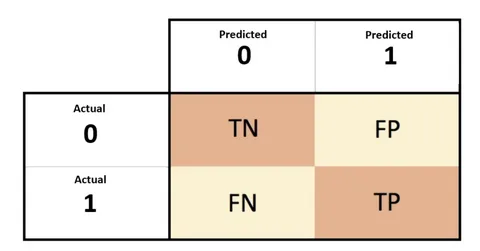

In [220]:
print((confusion_matrix(y_test_prep_stem, nb_smote_stem_predict)))

[[377  65]
 [  4  32]]


------------------------------------------

## Linear Support Vector Machine

In [93]:
sgd_smote = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_smote.fit(X_smote, y_smote)
sgd_adasyn = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_adasyn.fit(X_adasyn, y_adasyn)

sgd_smote_prep = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_smote_prep.fit(X_smote_prep, y_smote_prep)
sgd_adasyn_prep = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_adasyn_prep.fit(X_adasyn_prep, y_adasyn_prep)

sgd_smote_stem = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_smote_stem.fit(X_smote_stem, y_smote_stem)
sgd_adasyn_stem = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_adasyn_stem.fit(X_adasyn_stem, y_adasyn_stem)

sgd_smote_lemm = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_smote_lemm.fit(X_smote_lemm, y_smote_lemm)
sgd_adasyn_lemm = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_adasyn_lemm.fit(X_adasyn_lemm, y_adasyn_lemm)

SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)

In [95]:
sgd_smote_predict = pd.Series(sgd_smote.predict(X_test_vectorized))
sgd_adasyn_predict = pd.Series(sgd_adasyn.predict(X_test_vectorized))

sgd_smote_prep_predict = pd.Series(sgd_smote_prep.predict(X_test_prep_vectorized))
sgd_adasyn_prep_predict = pd.Series(sgd_adasyn_prep.predict(X_test_prep_vectorized))

sgd_smote_stem_predict = pd.Series(sgd_smote_stem.predict(X_test_prep_stem_vectorized))
sgd_adasyn_stem_predict = pd.Series(sgd_adasyn_stem.predict(X_test_prep_stem_vectorized))

sgd_smote_lemm_predict = pd.Series(sgd_smote_lemm.predict(X_test_prep_lemm_vectorized))
sgd_adasyn_lemm_predict = pd.Series(sgd_adasyn_lemm.predict(X_test_prep_lemm_vectorized))

my_tags = y_test_prep.unique().astype(str).tolist()

print('---------------y_test---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test, sgd_smote_predict), '--- SGD_smote_predict')
print(roc_auc_score(y_test, sgd_adasyn_predict),'--- SGD_adasyn_predict')
print(classification_report(y_test, sgd_smote_predict, target_names=my_tags))
print(classification_report(y_test, sgd_adasyn_predict, target_names=my_tags))
print('---------------y_test_prep---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep, sgd_smote_prep_predict), '--- SGD_smote_prep_predict')
print(roc_auc_score(y_test_prep, sgd_adasyn_prep_predict),'--- SGD_adasyn_prep_predict')
print(classification_report(y_test_prep, sgd_smote_prep_predict, target_names=my_tags))
print(classification_report(y_test_prep, sgd_adasyn_prep_predict, target_names=my_tags))
print('---------------y_test_prep_stem---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_stem, sgd_smote_stem_predict), '--- SGD_smote_stem_predict')
print(roc_auc_score(y_test_prep_stem, sgd_adasyn_stem_predict),'--- SGD_adasyn_stem_predict')
print(classification_report(y_test_prep_stem, sgd_smote_stem_predict, target_names=my_tags))
print(classification_report(y_test_prep_stem, sgd_adasyn_stem_predict, target_names=my_tags))
print('---------------y_test_prep_lemm---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_lemm, sgd_smote_lemm_predict), '--- SGD_smote_lemm_predict')
print(roc_auc_score(y_test_prep_lemm, sgd_adasyn_lemm_predict),'--- SGD_adasyn_lemm_predict')
print(classification_report(y_test_prep_lemm, sgd_smote_lemm_predict, target_names=my_tags))
print(classification_report(y_test_prep_lemm, sgd_adasyn_lemm_predict, target_names=my_tags))

---------------y_test--------------- 
 ____roc_auc_score____
0.7960030165912518 --- SGD_smote_predict
0.7914781297134238 --- SGD_adasyn_predict
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       442
           1       0.42      0.67      0.52        36

    accuracy                           0.91       478
   macro avg       0.70      0.80      0.73       478
weighted avg       0.93      0.91      0.92       478

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       442
           1       0.39      0.67      0.49        36

    accuracy                           0.90       478
   macro avg       0.68      0.79      0.72       478
weighted avg       0.93      0.90      0.91       478

---------------y_test_prep--------------- 
 ____roc_auc_score____
0.7926093514328808 --- SGD_smote_prep_predict
0.7903469079939668 --- SGD_adasyn_prep_predict
              precision    recall  f1-score

# Лучше всего показал себя предобработанный текст со Стеммигом и апсемплингом (и SMOTE и ADASYN)

---------------y_test_prep_stem--------------- \
 ____roc_auc_score____\
0.8447712418300652 --- SGD_smote_stem_predict\
0.8447712418300652 --- SGD_adasyn_stem_predict

-------------------precision----recall-------f1-score------support

           0       0.98      0.91      0.94       442
           1       0.42      0.78      0.54        36

In [219]:
print((confusion_matrix(y_test_prep_stem, sgd_smote_stem_predict)))

[[403  39]
 [  8  28]]


-------------------------------------------------

### Logistic Regression

In [96]:
logreg_smote = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_smote.fit(X_smote, y_smote)
logreg_adasyn = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_adasyn.fit(X_adasyn, y_adasyn)

logreg_smote_prep = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_smote_prep.fit(X_smote_prep, y_smote_prep)
logreg_adasyn_prep = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_adasyn_prep.fit(X_adasyn_prep, y_adasyn_prep)

logreg_smote_stem = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_smote_stem.fit(X_smote_stem, y_smote_stem)
logreg_adasyn_stem = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_adasyn_stem.fit(X_adasyn_stem, y_adasyn_stem)

logreg_smote_lemm = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_smote_lemm.fit(X_smote_lemm, y_smote_lemm)
logreg_adasyn_lemm = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_adasyn_lemm.fit(X_adasyn_lemm, y_adasyn_lemm)

c:\Users\Mi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

LogisticRegression(C=100000.0, class_weight='balanced', n_jobs=1)

In [97]:
logreg_smote_predict = pd.Series(logreg_smote.predict(X_test_vectorized))
logreg_adasyn_predict = pd.Series(logreg_adasyn.predict(X_test_vectorized))

logreg_smote_prep_predict = pd.Series(logreg_smote_prep.predict(X_test_prep_vectorized))
logreg_adasyn_prep_predict = pd.Series(logreg_adasyn_prep.predict(X_test_prep_vectorized))

logreg_smote_stem_predict = pd.Series(logreg_smote_stem.predict(X_test_prep_stem_vectorized))
logreg_adasyn_stem_predict = pd.Series(logreg_adasyn_stem.predict(X_test_prep_stem_vectorized))

logreg_smote_lemm_predict = pd.Series(logreg_smote_lemm.predict(X_test_prep_lemm_vectorized))
logreg_adasyn_lemm_predict = pd.Series(logreg_adasyn_lemm.predict(X_test_prep_lemm_vectorized))

my_tags = y_test_prep.unique().astype(str).tolist()

print('---------------y_test---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test, logreg_smote_predict), '--- logreg_smote_predict')
print(roc_auc_score(y_test, logreg_adasyn_predict),'--- logreg_adasyn_predict')
print(classification_report(y_test, logreg_smote_predict, target_names=my_tags))
print(classification_report(y_test, logreg_adasyn_predict, target_names=my_tags))
print('---------------y_test_prep---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep, logreg_smote_prep_predict), '--- logreg_smote_prep_predict')
print(roc_auc_score(y_test_prep, logreg_adasyn_prep_predict),'--- logreg_adasyn_prep_predict')
print(classification_report(y_test_prep, logreg_smote_prep_predict, target_names=my_tags))
print(classification_report(y_test_prep, logreg_adasyn_prep_predict, target_names=my_tags))
print('---------------y_test_prep_stem---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_stem, logreg_smote_stem_predict), '--- logreg_smote_stem_predict')
print(roc_auc_score(y_test_prep_stem, logreg_adasyn_stem_predict),'--- logreg_adasyn_stem_predict')
print(classification_report(y_test_prep_stem, logreg_smote_stem_predict, target_names=my_tags))
print(classification_report(y_test_prep_stem, logreg_adasyn_stem_predict, target_names=my_tags))
print('---------------y_test_prep_lemm---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_lemm, logreg_smote_lemm_predict), '--- logreg_smote_lemm_predict')
print(roc_auc_score(y_test_prep_lemm, logreg_adasyn_lemm_predict),'--- logreg_adasyn_lemm_predict')
print(classification_report(y_test_prep_lemm, logreg_smote_lemm_predict, target_names=my_tags))
print(classification_report(y_test_prep_lemm, logreg_adasyn_lemm_predict, target_names=my_tags))

---------------y_test--------------- 
 ____roc_auc_score____
0.7851935646053293 --- logreg_smote_predict
0.7840623428858723 --- logreg_adasyn_predict
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       442
           1       0.55      0.61      0.58        36

    accuracy                           0.93       478
   macro avg       0.76      0.79      0.77       478
weighted avg       0.94      0.93      0.93       478

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       442
           1       0.54      0.61      0.57        36

    accuracy                           0.93       478
   macro avg       0.75      0.78      0.77       478
weighted avg       0.94      0.93      0.93       478

---------------y_test_prep--------------- 
 ____roc_auc_score____
0.7840623428858723 --- logreg_smote_prep_predict
0.7829311211664153 --- logreg_adasyn_prep_predict
              precision    reca

In [214]:
print((confusion_matrix(y_test_prep_stem, logreg_smote_stem_predict)))

[[425  17]
 [ 12  24]]


# Лучше всего показал себя предобработанный текст со Стеммигом и апсемплингом SMOTE

---------------y_test_prep_stem--------------- \
 ____roc_auc_score____\
0.814102564102564 --- logreg_smote_stem_predict\
0.812971342383107 --- logreg_adasyn_stem_predict

-------------------precision----recall-------f1-score------support

           0       0.97      0.96      0.97       442
           1       0.57      0.67      0.62        36

In [221]:
logreg = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg.fit(X_train_vectorized, y_train)
logreg_predict = pd.Series(logreg.predict(X_test_vectorized))

my_tags = y_test.unique().astype(str).tolist()

print('---------------y_test---------------', '\n','______logreg____')
print(roc_auc_score(y_test, logreg_predict), '--- logreg_smote_predict')

print(classification_report(y_test, logreg_predict, target_names=my_tags))

---------------y_test--------------- 
 ______logreg____
0.7851935646053293 --- logreg_smote_predict
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       442
           1       0.55      0.61      0.58        36

    accuracy                           0.93       478
   macro avg       0.76      0.79      0.77       478
weighted avg       0.94      0.93      0.93       478



In [222]:
print((confusion_matrix(y_test, logreg_predict)))

[[424  18]
 [ 14  22]]


<font color='#87CEEB'><i>  Модель с самым большим RECALL для 1 класса (нужного нам) --  Naive Bayes Classifier </i></font>

## CatBoostRegressor

In [100]:
cbr_smote = CatBoostRegressor(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbr_smote.fit(X_smote, y_smote)
cbr_adasyn = CatBoostRegressor(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbr_adasyn.fit(X_adasyn, y_adasyn)

cbr_smote_prep = CatBoostRegressor(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbr_smote_prep.fit(X_smote_prep, y_smote_prep)
cbr_adasyn_prep = CatBoostRegressor(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbr_adasyn_prep.fit(X_adasyn_prep, y_adasyn_prep)

cbr_smote_stem = CatBoostRegressor(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbr_smote_stem.fit(X_smote_stem, y_smote_stem)
cbr_adasyn_stem = CatBoostRegressor(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbr_adasyn_stem.fit(X_adasyn_stem, y_adasyn_stem)

cbr_smote_lemm = CatBoostRegressor(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbr_smote_lemm.fit(X_smote_lemm, y_smote_lemm)
cbr_adasyn_lemm = CatBoostRegressor(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbr_adasyn_lemm.fit(X_adasyn_lemm, y_adasyn_lemm)

0:	learn: 0.4703633	total: 178ms	remaining: 5m 29s
1:	learn: 0.4465513	total: 209ms	remaining: 3m 13s
2:	learn: 0.4215977	total: 243ms	remaining: 2m 29s
3:	learn: 0.4008606	total: 273ms	remaining: 2m 6s
4:	learn: 0.3802488	total: 302ms	remaining: 1m 51s
5:	learn: 0.3622670	total: 334ms	remaining: 1m 42s
6:	learn: 0.3475880	total: 367ms	remaining: 1m 36s
7:	learn: 0.3338757	total: 401ms	remaining: 1m 32s
8:	learn: 0.3219370	total: 502ms	remaining: 1m 42s
9:	learn: 0.3104484	total: 546ms	remaining: 1m 40s
10:	learn: 0.3002115	total: 577ms	remaining: 1m 36s
11:	learn: 0.2912494	total: 607ms	remaining: 1m 32s
12:	learn: 0.2838594	total: 640ms	remaining: 1m 30s
13:	learn: 0.2769093	total: 673ms	remaining: 1m 28s
14:	learn: 0.2715568	total: 706ms	remaining: 1m 26s
15:	learn: 0.2657886	total: 737ms	remaining: 1m 24s
16:	learn: 0.2602536	total: 769ms	remaining: 1m 22s
17:	learn: 0.2555921	total: 801ms	remaining: 1m 21s
18:	learn: 0.2512964	total: 832ms	remaining: 1m 20s
19:	learn: 0.2471367	to

In [102]:
threshold = 0.5

cbr_smote_predict_binary = (cbr_smote_predict > threshold).astype(int)
cbr_adasyn_predict_binary = (cbr_adasyn_predict > threshold).astype(int)
cbr_smote_prep_predict_binary = (cbr_smote_prep_predict > threshold).astype(int)
cbr_adasyn_prep_predict_binary = (cbr_adasyn_prep_predict > threshold).astype(int)
cbr_smote_stem_predict_binary = (cbr_smote_stem_predict > threshold).astype(int)
cbr_adasyn_stem_predict_binary = (cbr_adasyn_stem_predict > threshold).astype(int)
cbr_smote_lemm_predict_binary = (cbr_smote_lemm_predict > threshold).astype(int)
cbr_adasyn_lemm_predict_binary = (cbr_adasyn_lemm_predict > threshold).astype(int)

print('---------------y_test---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test, cbr_smote_predict_binary), '--- cbr_smote_predict')
print(roc_auc_score(y_test, cbr_adasyn_predict_binary),'--- cbr_adasyn_predict')
print(classification_report(y_test, cbr_smote_predict_binary, target_names=my_tags))
print(classification_report(y_test, cbr_adasyn_predict_binary, target_names=my_tags))
print('---------------y_test_prep---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep, cbr_smote_prep_predict_binary), '--- cbr_smote_prep_predict')
print(roc_auc_score(y_test_prep, cbr_adasyn_prep_predict_binary),'--- cbr_adasyn_prep_predict')
print(classification_report(y_test_prep, cbr_smote_prep_predict_binary, target_names=my_tags))
print(classification_report(y_test_prep, cbr_adasyn_prep_predict_binary, target_names=my_tags))
print('---------------y_test_prep_stem---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_stem, cbr_smote_stem_predict_binary), '--- cbr_smote_stem_predict')
print(roc_auc_score(y_test_prep_stem, cbr_adasyn_stem_predict_binary),'--- cbr_adasyn_stem_predict')
print(classification_report(y_test_prep_stem, cbr_smote_stem_predict_binary, target_names=my_tags))
print(classification_report(y_test_prep_stem, cbr_adasyn_stem_predict_binary, target_names=my_tags))
print('---------------y_test_prep_lemm---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_lemm, cbr_smote_lemm_predict_binary), '--- cbr_smote_lemm_predict')
print(roc_auc_score(y_test_prep_lemm, cbr_adasyn_lemm_predict_binary),'--- cbr_adasyn_lemm_predict')
print(classification_report(y_test_prep_lemm, cbr_smote_lemm_predict_binary, target_names=my_tags))
print(classification_report(y_test_prep_lemm, cbr_adasyn_lemm_predict_binary, target_names=my_tags))

---------------y_test--------------- 
 ____roc_auc_score____
0.7562845651080945 --- cbr_smote_predict
0.7517596782302663 --- cbr_adasyn_predict
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       442
           1       0.51      0.56      0.53        36

    accuracy                           0.93       478
   macro avg       0.74      0.76      0.75       478
weighted avg       0.93      0.93      0.93       478

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       442
           1       0.47      0.56      0.51        36

    accuracy                           0.92       478
   macro avg       0.71      0.75      0.73       478
weighted avg       0.93      0.92      0.92       478

---------------y_test_prep--------------- 
 ____roc_auc_score____
0.7412644544997485 --- cbr_smote_prep_predict
0.7656485671191553 --- cbr_adasyn_prep_predict
              precision    recall  f1-score

# Лучше всего показал себя предобработанный текст со Стеммигом и апсемплингом ADASYN

---------------y_test_prep_stem--------------- \
 ____roc_auc_score____\
0.8036073403720462 --- cbr_smote_stem_predict\
0.816365007541478 --- cbr_adasyn_stem_predict

-------------------precision----recall-------f1-score------support

           0       0.97      0.97      0.97       442
           1       0.62      0.67      0.64        36

In [212]:
print((confusion_matrix(y_test_prep_stem, cbr_adasyn_stem_predict_binary)))

[[427  15]
 [ 12  24]]


----------------------------------

### Проверка на примерах

In [191]:
podhodit = '''
№ 101 Оказание услуг по сопровождению Государственной информационной системы Удмуртской Республики «Управление финансово-экономической деятельностью государственных органов Удмуртской Республики, органов местного самоуправления в Удмуртской Республике и подведомственных им учреждений» для нужд автономного учреждения «Центр цифровых технологий Удмуртской Республики»
'''

In [192]:
podhodit = remove_multiple_spaces(remove_numbers(remove_punctuation(podhodit.lower())))
podhodit = remove_stop_words(podhodit)

In [193]:
podhodit

'оказание услуг сопровождению государственной информационной системы удмуртской республики управление финансово экономической деятельностью государственных органов удмуртской республики органов местного самоуправления удмуртской республике подведомственных учреждений нужд автономного учреждения центр цифровых технологий удмуртской республики'

In [194]:
tokens_podhodit = word_tokenize(podhodit) 

In [ ]:
# stemmed_podhodit = []
# for text in tqdm(podhodit):
#     tokens = word_tokenize(text)    
#     stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in russian_stopwords]
#     text = " ".join(stemmed_tokens)
#     stemmed_podhodit.append(text)

In [198]:
stemmed_podhodit_tfidf = tfidf_vectorizer_prep_stem.transform(tokens_podhodit)

In [200]:
podhodit_pred = nb_smote_stem.predict(stemmed_podhodit_tfidf)

In [201]:
podhodit_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
# nb_smote_stem_predict
# nb_adasyn_stem_predict

In [187]:
skoree_da = '''
Закупка комплекса услуг по технической поддержке информационных технологий для нужд Администрации Одинцовского городского округа Московской области в 2023 году
'''

In [188]:
skoree_da = remove_multiple_spaces(remove_numbers(remove_punctuation(skoree_da.lower())))
skoree_da = remove_stop_words(skoree_da)
skoree_da = lemmatize_text(skoree_da)
skoree_da = word_tokenize(skoree_da) 

# skoree_da_pred = nb_smote_lemm.predict(lemm_skoree_da_tfidf)

In [189]:
# Векторизация входных данных с использованием той же модели TfidfVectorizer
skoree_da_tfidf = tfidf_vectorizer.transform([skoree_da])

# Предсказание с использованием модели nb_smote_lemm
skoree_da_pred = nb_smote_lemm.predict(skoree_da_tfidf)

AttributeError: 'list' object has no attribute 'lower'

In [186]:
skoree_da_pred = nb_smote_lemm.predict(lemm_skoree_da_tfidf)

# skoree_da_pred = nb_smote_stem.predict([lemm_skoree_da_tfidf])
# skoree_da_pred

ValueError: X has 15 features, but MultinomialNB is expecting 2892 features as input.

In [ ]:
skoree_net = '''
Оказание услуг по абонентскому обслуживанию программы ЭВМ на базе информационной бизнес-платформы ODANT «Информационная система управления программой проведения капитального ремонта многоквартирных домов Рязанской области» 
'''

In [ ]:
skoree_net = remove_multiple_spaces(remove_numbers(remove_punctuation(skoree_net.lower())))
skoree_net = remove_stop_words(skoree_net)
skoree_net = lemmatize_text(skoree_net)

In [ ]:
skoree_net_pred = logreg.predict([skoree_net])
skoree_net_pred